In [11]:
#获取并修改像素值
import cv2
import numpy as np
img = cv2.imread('1.png')
# cv2.imshow('image',img)
# cv2.waitKey(0)
px = img[100,100]   #获取图像像素值
print(px)
blue = img[100,100,0]
print(blue)


#修改图像的像素值
img[100:110,100:110] = [255,255,255]
cv2.imshow('image',img)
cv2.waitKey(0)

#item,itemset
print(img.item(100,100,0))
img.itemset((100,100,0),100)
print(img.item(100,100,0))

[163 163 163]
163
255
100


In [19]:
#图像ROI
import cv2
import numpy as np
img = cv2.imread('1.png')
print('img_shape',img.shape)
print('img_size',img.size)
print('img_type',img.dtype)

ding = img[400:495,200:300]
img[100:195,200:300] = ding
cv2.imshow('image',img)
cv2.waitKey(0)


img_shape (496, 500, 3)
img_size 744000
img_type uint8


-1

In [6]:
#图像通道
import cv2
import numpy as np
img = cv2.imread('1.png')
r = img[:,:,2 
img[:,:,2] = 0            #b,g,r=0,1,2;将r对应通道的值改为255时是红色
cv2.imshow('image',img)
cv2.waitKey(0)


-1

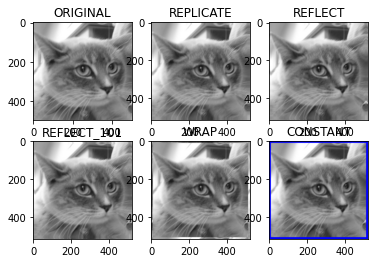

In [10]:
#为图像扩边
import cv2 
import numpy as np
import matplotlib.pyplot as plt
BLUE=[0,0,255]     #matplot是rgb,cv2是bgr
img1 = cv2.imread('1.png')
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

In [31]:
#图像的算数运算
import numpy as np
import cv2
x = np.uint8([250])
y = np.uint8([10])
print(cv2.add(x,y))    #cv2加法不能超出255
print(x+y)             #numpy加法超出255做了模256


#图像混合
img1 = cv2.imread('1.png')
img2 = cv2.imread('2.png')
img1[:,:,2] = 0
img2 = img2[2:498,:,:]
print(img1.shape,img2.shape)
dst = cv2.addWeighted(img1,0.8,img2,0.5,0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


[[255]]
[4]
(496, 500, 3) (496, 500, 3)


In [49]:
import numpy as np 
import cv2
#整体思想是将对logo进行处理，然后加到big图片上
#按位运算
img1 = cv2.imread('big.png')
img2 = cv2.imread('2.png')
print(img1.shape,img2.shape)
rows,cols,channels = img2.shape

roi = img1[0:rows,0:cols,:]
cv2.imshow('roi',roi)
cv2.waitKey(0)

img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
cv2.imshow('img2gray',img2gray)
cv2.waitKey(0)
print(img2gray.shape)    #(500, 500)，已经成为单通道了

ret,mask = cv2.threshold(img2gray,175,255,cv2.THRESH_BINARY)
cv2.imshow('mask',mask)   #将二值图像像素值高于175的全变为白色
cv2.waitKey(0)

mask_inv = cv2.bitwise_not(mask)
cv2.imshow('mask_inv',mask_inv)
cv2.waitKey(0)

img1_bg = cv2.bitwise_and(roi,roi,mask=mask)
cv2.imshow('img1_bg',img1_bg)
cv2.waitKey(0)

img2_fg = cv2.bitwise_and(img2,img2,mask=mask_inv)
cv2.imshow('img2_fg',img2_fg)
cv2.waitKey(0)

dst = cv2.add(img1_bg,img2_fg)
img1[0:rows,0:cols] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1200, 1920, 3) (500, 500, 3)
(500, 500)


In [2]:
#用cv2制作一张幻灯片
import numpy as np
import cv2

img1 = cv2.imread('1.png')
img2 = cv2.imread('2.png')
img1[:,:,2] = 0
img2 = img2[2:498,:,:]
print(img1.shape,img2.shape)
dst = cv2.addWeighted(img1,0.8,img2,0.5,0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

for i in np.arange(0,1,0.01):
    dst = cv2.addWeighted(img1,i,img2,1-i,0)
    cv2.imshow('changing',dst)
    cv2.waitKey(0)
cv2.destroyAllWindows()

(496, 500, 3) (496, 500, 3)


In [2]:
import numpy as np
import cv2

image = cv2.imread('1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imshow('dst',image)
cv2.waitKey(0)

27